<a href="https://colab.research.google.com/github/PavelStelmakhV/hw310-keras-fasion-mnist/blob/main/keras_fasion_mnist_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras import regularizers
from keras import callbacks
from keras import initializers
from keras.layers import BatchNormalization

In [179]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [180]:
# x_train = x_train.reshape(60000, 784).astype('float32') / 255
# x_test = x_test.reshape(10000, 784).astype('float32') / 255
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Перемешаем тренировочные данные
# train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [181]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [182]:
w_init = initializers.glorot_normal()
b_init = initializers.Zeros()

# model = Sequential()
# model.add(Dense(n_dense,
#                 input_dim=n_input,
#                 kernel_initializer=w_init,
#                 bias_initializer=b_init))
# model.add(Activation('sigmoid'))

In [183]:
model = tf.keras.Sequential()

drop_out = 0.2
lern_rat = 0.00001
neurons = 512

model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(neurons * 1, activation='relu', kernel_initializer=w_init, bias_initializer=b_init)) #, kernel_regularizer=regularizers.l2(lern_rat)
# model.add(BatchNormalization())
# model.add(layers.Dropout(drop_out))
model.add(layers.Dense(neurons * 2, activation='tanh'))
model.add(BatchNormalization())
model.add(layers.Dropout(drop_out))

model.add(layers.Dense(neurons * 2, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(drop_out))

model.add(layers.Dense(neurons * 4, activation='tanh'))
model.add(BatchNormalization())
model.add(layers.Dropout(drop_out))

model.add(layers.Dense(10, activation='softmax'))

In [184]:
model.compile(#optimizer='adam',
              optimizer='adamax',
              # optimizer='nadam',
              # optimizer='rmsprop',
              # optimizer='sgd',
              # optimizer='adadelta',
              # loss='binary_crossentropy',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # sparse_categorical_accuracy

1/1 [==============================] - 0s 139ms/step


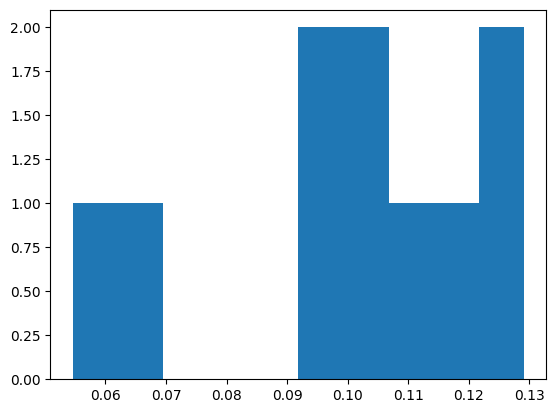

In [185]:
x = np.random.random((1, 28, 28))
a = model.predict(x)
_ = plt.hist(np.transpose(a))

In [186]:
callback = callbacks.EarlyStopping(monitor='val_loss', patience=12)

In [187]:
# model.fit(train_images, train_labels, epochs=20)
history = model.fit(x_train, y_train,
                    epochs=120,
                    batch_size=64,
                    callbacks=[callback],
                    verbose=1, #многословие
                    validation_data=(x_val, y_val))
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/120
782/782 [==============================] - 81s 100ms/step - loss: 0.7130 - accuracy: 0.7705 - val_loss: 0.5006 - val_accuracy: 0.8251
Epoch 2/120
782/782 [==============================] - 79s 101ms/step - loss: 0.5192 - accuracy: 0.8174 - val_loss: 0.5011 - val_accuracy: 0.8339
Epoch 3/120
782/782 [==============================] - 76s 97ms/step - loss: 0.4622 - accuracy: 0.8349 - val_loss: 0.4070 - val_accuracy: 0.8514
Epoch 4/120
782/782 [==============================] - 79s 101ms/step - loss: 0.4228 - accuracy: 0.8443 - val_loss: 0.3762 - val_accuracy: 0.8640
Epoch 5/120
782/782 [==============================] - 76s 97ms/step - loss: 0.3948 - accuracy: 0.8544 - val_loss: 0.3566 - val_accuracy: 0.8707
Epoch 6/120
782/782 [==============================] - 77s 99ms/step - loss: 0.3719 - accuracy: 0.8629 - val_loss: 0.3501 - val_accuracy: 0.8765
Epoch 7/120
782/782 [==============================] - 77s 98ms/step - loss: 0.3603 - accuracy: 0.8658 - val_loss: 0.3453 - val

In [188]:
print('\nhistory dict:', list(history.history.keys()))


history dict: ['loss', 'accuracy', 'val_loss', 'val_accuracy']


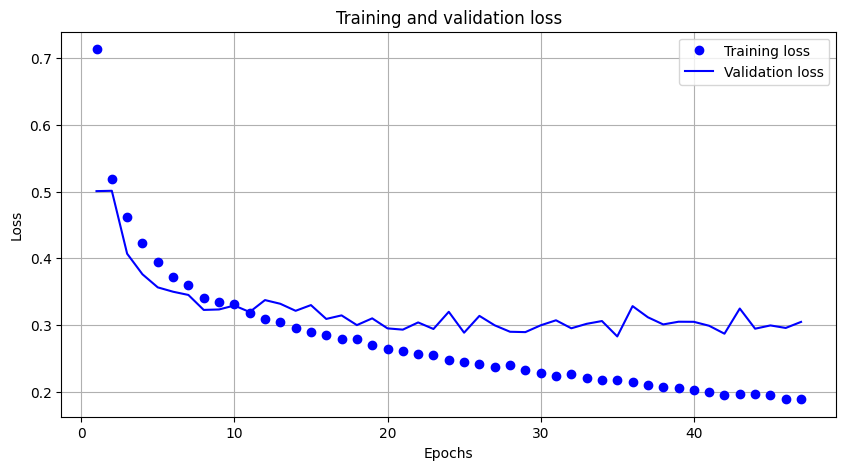

<Figure size 640x480 with 0 Axes>

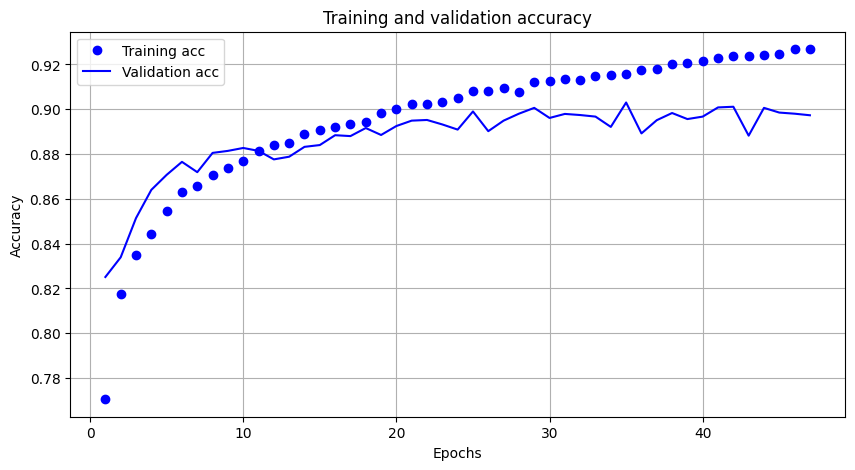

In [189]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.clf()
plt.figure(figsize=(10, 5))
val_acc_values = history_dict['accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [190]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [191]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 4s 14ms/step


In [192]:
predictions[0]

array([0.08533717, 0.08533717, 0.08533717, 0.08533717, 0.08533717,
       0.08533726, 0.08533717, 0.08534005, 0.08533717, 0.2319624 ],
      dtype=float32)

In [193]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dropout_46 (Dropout)        (None, 784)               0         
                                                                 
 dense_60 (Dense)            (None, 512)               401920    
                                                                 
 dense_61 (Dense)            (None, 1024)              525312    
                                                                 
 batch_normalization_36 (Ba  (None, 1024)              4096      
 tchNormalization)                                               
                                                                 
 dropout_47 (Dropout)        (None, 1024)              0         
                                                     